# **Planejamento do Projeto**
**Descrição do Cenário**
-  Objetivo: O projeto busca analisar a evolução da pandemia de COVID-19 globalmente desde 2019 até a data atual, destacando padrões regionais, a relação entre casos confirmados, mortes e recuperações, além de identificar tendências.
-  Contexto fictício: O estudo será realizado por uma organização internacional fictícia chamada Health Data Insights, que utiliza ciência de dados para suportar decisões de saúde pública.
-  Motivação: Compreender a evolução da pandemia é fundamental para planejar respostas a futuras emergências globais de saúde, identificar falhas nas respostas regionais e promover melhorias no sistema de saúde.



# **Tecnologias Adotadas**
1. Bibliotecas:
Pandas e NumPy: Manipulação e análise de dados.
Matplotlib e Seaborn: Criação de gráficos para análise visual.
Plotly: Visualizações interativas.
Scikit-learn: Para modelagem (caso seja necessário).
2. Justificativa: Essas bibliotecas oferecem funcionalidades robustas e são amplamente utilizadas em análises de dados e aprendizado de máquina.
3. Descrição do Dataset
-  Estrutura:
Três arquivos CSV com informações globais sobre casos confirmados, mortes e recuperações por país e ao longo do tempo.
Colunas principais: Country/Region, Province/State, Lat, Long, e colunas para cada data representando o número cumulativo de casos.
-  Utilização: O cruzamento desses dados permite analisar taxas de mortalidade e recuperação e identificar tendências temporais e regionais.

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Abertura do Dataset
Vamos carregar os três arquivos CSV e trabalhar com as colunas correspondentes ao Brasil. Usaremos o Pandas para manipular os dados.


In [2]:
# Carregamento dos datasets
# URLs dos arquivos CSV
url_confirmed = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
url_deaths = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_deaths_global.csv&filename=time_series_covid19_deaths_global.csv"
url_recovered = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"

# Carregando os arquivos em DataFrames
confirmed = pd.read_csv(url_confirmed)
deaths = pd.read_csv(url_deaths)
recovered = pd.read_csv(url_recovered)

# Verificando as primeiras linhas de cada DataFrame para validar a importação
print(confirmed.head())
print(deaths.head())
print(recovered.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

- Filtrar só valores para Brazil

In [3]:
# Filtragem para o Brasil
confirmed_brazil = confirmed[confirmed['Country/Region'] == 'Brazil'].iloc[:, 4:].T
deaths_brazil = deaths[deaths['Country/Region'] == 'Brazil'].iloc[:, 4:].T
recovered_brazil = recovered[recovered['Country/Region'] == 'Brazil'].iloc[:, 4:].T

In [9]:
# Ajuste das colunas e conversão de datas
confirmed_brazil.columns = ['Confirmed']
deaths_brazil.columns = ['Deaths']
recovered_brazil.columns = ['Recovered']
confirmed_brazil.index = pd.to_datetime(confirmed_brazil.index)
deaths_brazil.index = pd.to_datetime(deaths_brazil.index)
recovered_brazil.index = pd.to_datetime(recovered_brazil.index)

# Unindo os datasets
brazil_data = confirmed_brazil.join(deaths_brazil).join(recovered_brazil)

2. Pré-processamento
Limpeza dos dados:
Remoção de valores ausentes ou inconsistentes (ex.: valores zerados ou negativos).
Transformações:
Converter colunas de datas em formato datetime.
Criar colunas para taxas de mortalidade e recuperação.
Unificar os datasets de casos confirmados, mortes e recuperações.


In [10]:
# Criando métricas adicionais
brazil_data['Mortality Rate'] = (brazil_data['Deaths'] / brazil_data['Confirmed']) * 100
brazil_data['Recovery Rate'] = (brazil_data['Recovered'] / brazil_data['Confirmed']) * 100



In [31]:
# Removendo valores inconsistentes (linhas com Confirmed, Deaths ou Recovered <= 0)
brazil_data = brazil_data[brazil_data['Confirmed'] > 0]
brazil_data = brazil_data[brazil_data['Deaths'] > 0]
brazil_data = brazil_data[brazil_data['Recovered'] > 0]

3. Análise Exploratória (EDA)
Utilizaremos pelo menos três visualizações para:
Identificar padrões temporais na evolução dos casos no Brasil.
Verificar correlações entre os dados (casos confirmados, mortes e recuperações).
Destacar períodos críticos, outliers e anomalias.


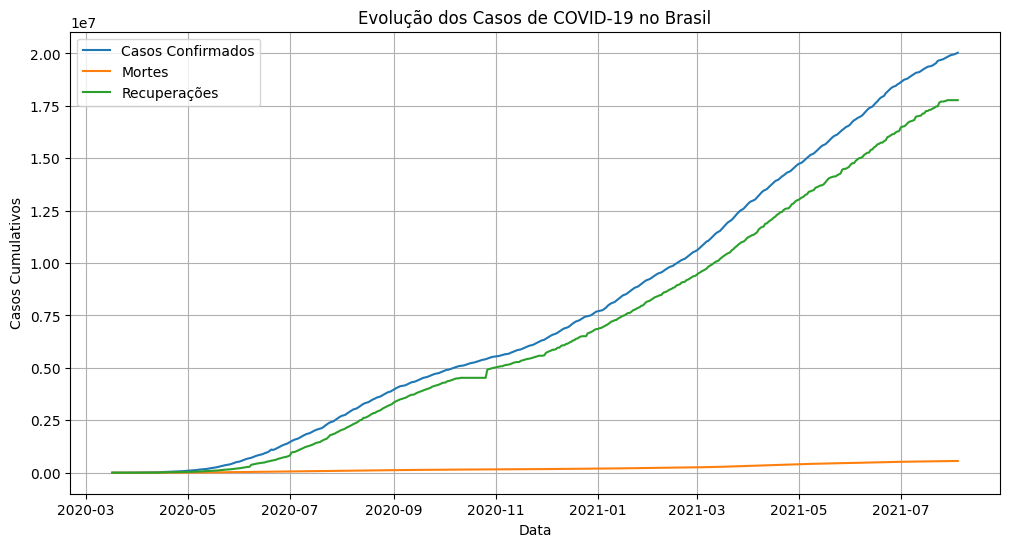

In [32]:
# Visualização 1: Evolução temporal dos casos
plt.figure(figsize=(12, 6))
sns.lineplot(data=brazil_data, x=brazil_data.index, y='Confirmed', label='Casos Confirmados')
sns.lineplot(data=brazil_data, x=brazil_data.index, y='Deaths', label='Mortes')
sns.lineplot(data=brazil_data, x=brazil_data.index, y='Recovered', label='Recuperações')
plt.title('Evolução dos Casos de COVID-19 no Brasil')
plt.xlabel('Data')
plt.ylabel('Casos Cumulativos')
plt.legend()
plt.grid()
plt.show()

4. Treinamento de Modelo de ML
Escolha do modelo:
Usaremos um modelo de Regressão Linear para prever o número de casos futuros com base em tendências históricas.
Ajustes e Treinamento:
Divisão dos dados em treino e teste.
Ajuste de hiperparâmetros básicos (como alpha para regularização, se necessário).


In [40]:
# Modelo de Regressão Linear
# Criando variáveis independentes (tempo) e dependentes (casos confirmados)
brazil_data['Days'] = (brazil_data.index - brazil_data.index.min()).days

In [41]:
# Para casos Confirmados
X_confirmed = brazil_data[['Days']]  # Variável independente para Confirmados
y_confirmed = brazil_data['Confirmed']  # Variável dependente para Confirmados

In [42]:
# Para Mortes
X_deaths = brazil_data[['Days']]  # Variável independente para Mortes
y_deaths = brazil_data['Deaths']  # Variável dependente para Mortes

In [43]:
# Para Recuperações
X_recovered = brazil_data[['Days']]  # Variável independente para Recuperações
y_recovered = brazil_data['Recovered']  # Variável dependente para Recuperações

In [44]:
from sklearn.model_selection import train_test_split

# Divisão entre treino e teste para Confirmados
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(X_confirmed, y_confirmed, test_size=0.2, random_state=42)

# Divisão entre treino e teste para Mortes
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(X_deaths, y_deaths, test_size=0.2, random_state=42)

# Divisão entre treino e teste para Recuperações
X_train_recovered, X_test_recovered, y_train_recovered, y_test_recovered = train_test_split(X_recovered, y_recovered, test_size=0.2, random_state=42)


In [45]:
# Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

5. Predição e Interpretabilidade
Realizaremos predições para o número de casos futuros e interpretaremos os coeficientes do modelo para entender o impacto temporal.


In [46]:

# Modelo para Confirmados
model_confirmed = LinearRegression()
model_confirmed.fit(X_train_confirmed, y_train_confirmed)  # Treinando o modelo
y_pred_confirmed = model_confirmed.predict(X_test_confirmed)  # Predição para os casos confirmados

# Modelo para Mortes
model_deaths = LinearRegression()
model_deaths.fit(X_train_deaths, y_train_deaths)  # Treinando o modelo
y_pred_deaths = model_deaths.predict(X_test_deaths)  # Predição para os casos de mortes

# Modelo para Recuperações
model_recovered = LinearRegression()
model_recovered.fit(X_train_recovered, y_train_recovered)  # Treinando o modelo
y_pred_recovered = model_recovered.predict(X_test_recovered)  # Predição para os casos de recuperações

6. Avaliação
Avaliaremos o modelo com métricas como:
RMSE (Root Mean Squared Error) para medir o erro.
R² (coeficiente de determinação) para verificar o ajuste.

In [47]:
# Avaliação do modelo para Confirmados
rmse_confirmed = np.sqrt(mean_squared_error(y_test_confirmed, y_pred_confirmed))
r2_confirmed = r2_score(y_test_confirmed, y_pred_confirmed)
print(f'RMSE (Confirmados): {rmse_confirmed:.2f}')
print(f'R² (Confirmados): {r2_confirmed:.2f}')

# Avaliação do modelo para Mortes
rmse_deaths = np.sqrt(mean_squared_error(y_test_deaths, y_pred_deaths))
r2_deaths = r2_score(y_test_deaths, y_pred_deaths)
print(f'RMSE (Mortes): {rmse_deaths:.2f}')
print(f'R² (Mortes): {r2_deaths:.2f}')

# Avaliação do modelo para Recuperações
rmse_recovered = np.sqrt(mean_squared_error(y_test_recovered, y_pred_recovered))
r2_recovered = r2_score(y_test_recovered, y_pred_recovered)
print(f'RMSE (Recuperações): {rmse_recovered:.2f}')
print(f'R² (Recuperações): {r2_recovered:.2f}')

RMSE (Confirmados): 1217811.32
R² (Confirmados): 0.97
RMSE (Mortes): 43095.60
R² (Mortes): 0.95
RMSE (Recuperações): 1092720.85
R² (Recuperações): 0.97


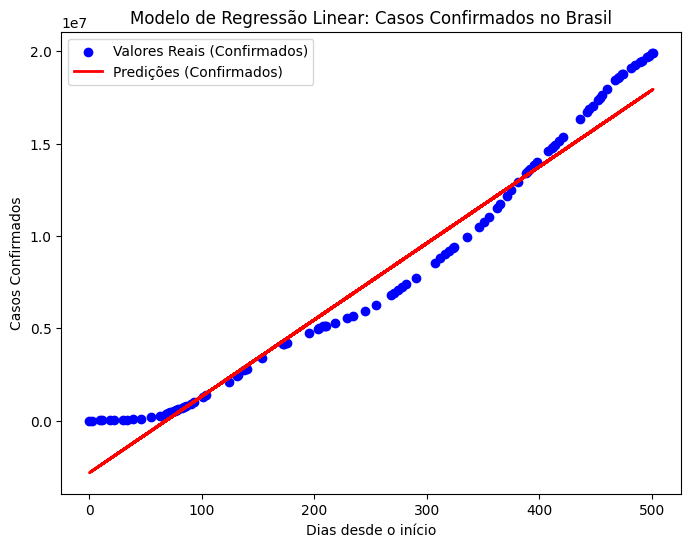

In [48]:
# Gráfico: Predições vs Valores reais para Confirmados
plt.figure(figsize=(8, 6))
plt.scatter(X_test_confirmed, y_test_confirmed, color='blue', label='Valores Reais (Confirmados)')
plt.plot(X_test_confirmed, y_pred_confirmed, color='red', linewidth=2, label='Predições (Confirmados)')
plt.title('Modelo de Regressão Linear: Casos Confirmados no Brasil')
plt.xlabel('Dias desde o início')
plt.ylabel('Casos Confirmados')
plt.legend()
plt.show()



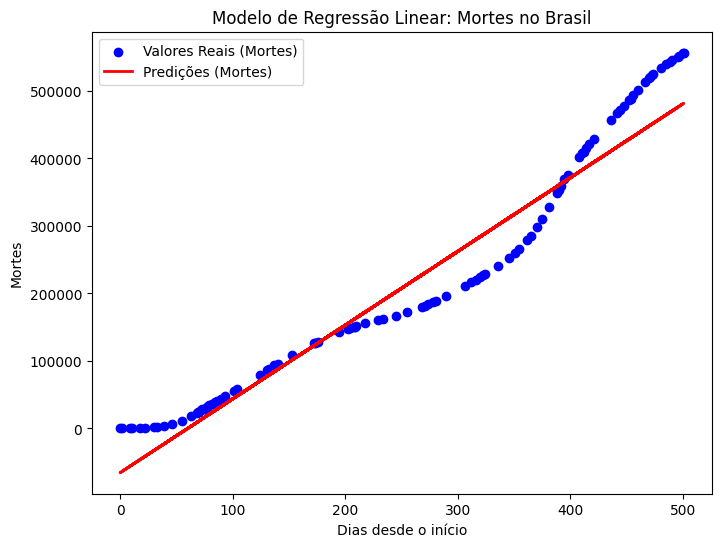

In [49]:
# Gráfico: Predições vs Valores reais para Mortes
plt.figure(figsize=(8, 6))
plt.scatter(X_test_deaths, y_test_deaths, color='blue', label='Valores Reais (Mortes)')
plt.plot(X_test_deaths, y_pred_deaths, color='red', linewidth=2, label='Predições (Mortes)')
plt.title('Modelo de Regressão Linear: Mortes no Brasil')
plt.xlabel('Dias desde o início')
plt.ylabel('Mortes')
plt.legend()
plt.show()



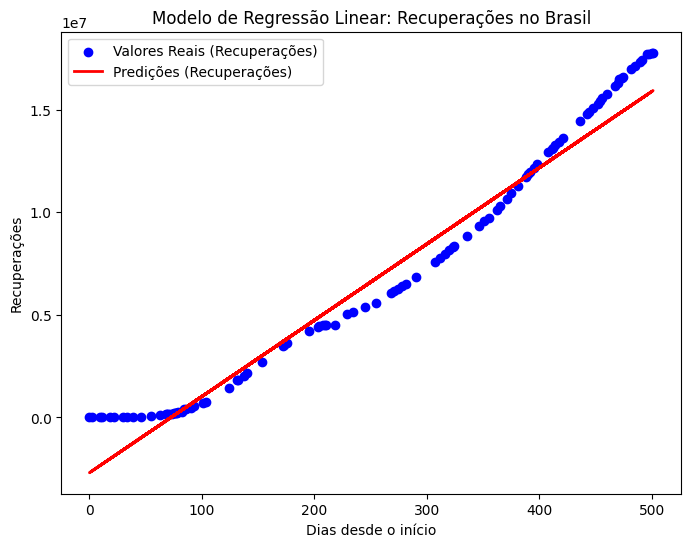

In [50]:
# Gráfico: Predições vs Valores reais para Recuperações
plt.figure(figsize=(8, 6))
plt.scatter(X_test_recovered, y_test_recovered, color='blue', label='Valores Reais (Recuperações)')
plt.plot(X_test_recovered, y_pred_recovered, color='red', linewidth=2, label='Predições (Recuperações)')
plt.title('Modelo de Regressão Linear: Recuperações no Brasil')
plt.xlabel('Dias desde o início')
plt.ylabel('Recuperações')
plt.legend()
plt.show()

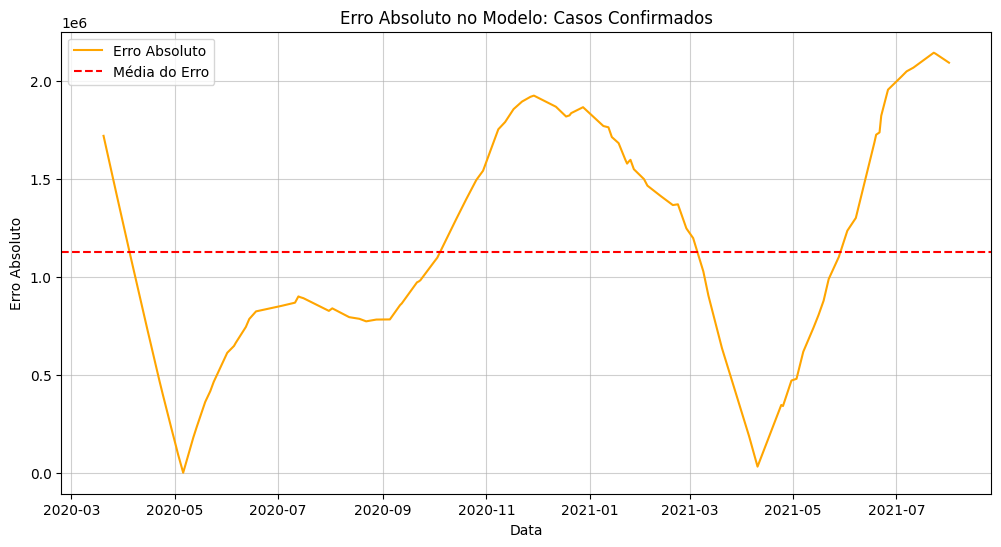

In [54]:
# Visualização 1: Gráfico de Erro Absoluto ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(data=brazil_data, x=brazil_data.index, y='Erro_Absoluto', color='orange', label='Erro Absoluto')
plt.axhline(y=brazil_data['Erro_Absoluto'].mean(), color='red', linestyle='--', label='Média do Erro')
plt.title('Erro Absoluto no Modelo: Casos Confirmados')
plt.xlabel('Data')
plt.ylabel('Erro Absoluto')
plt.legend()
plt.grid(alpha=0.6)
plt.show()



Erro Absoluto ao Longo do Tempo:

Calcula o erro absoluto entre os valores reais e preditos e o plota como uma linha.
Uma linha horizontal é traçada na média do erro absoluto para contextualizar.

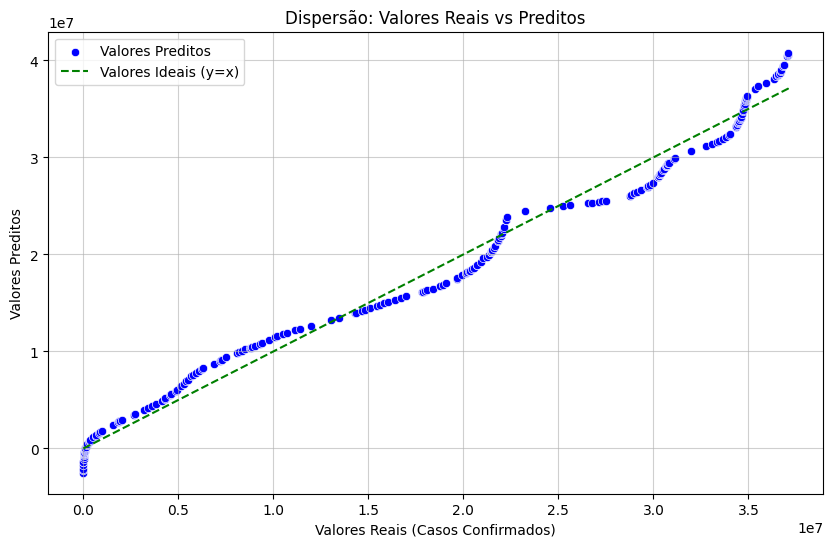

In [22]:
# Visualização 2: Gráfico de Dispersão (Valores Reais vs Preditos)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=brazil_data['Confirmed'], y=brazil_data['Predicted'], label='Valores Preditos', color='blue')
plt.plot(brazil_data['Confirmed'], brazil_data['Confirmed'], color='green', linestyle='--', label='Valores Ideais (y=x)')
plt.title('Dispersão: Valores Reais vs Preditos')
plt.xlabel('Valores Reais (Casos Confirmados)')
plt.ylabel('Valores Preditos')
plt.legend()
plt.grid(alpha=0.6)
plt.show()

Visualiza como os valores preditos se alinham com os reais.
A linha ideal y=x facilita a avaliação da precisão do modelo (quanto mais próximos da linha, melhor o desempenho).

# **Adicional Insights para casos globais**

Totais globais de casos, mortes e recuperações.
Taxas globais de mortalidade e recuperação.
Dia com maior aumento de casos reportados.
Países com maior número de casos, mortes e recuperações.
Isso fornece um panorama inicial para identificar padrões e pontos de atenção nos dados.

In [27]:
# Cálculos e Insights
def generate_insights(confirmed, deaths, recovered):
    insights = {}

    # Total geral de casos, mortes e recuperações
    insights['Total Confirmados'] = confirmed.iloc[:, 4:].sum().sum()
    insights['Total Mortes'] = deaths.iloc[:, 4:].sum().sum()
    insights['Total Recuperados'] = recovered.iloc[:, 4:].sum().sum()

    # Taxas gerais
    insights['Taxa de Mortalidade (%)'] = (insights['Total Mortes'] / insights['Total Confirmados']) * 100
    insights['Taxa de Recuperação (%)'] = (insights['Total Recuperados'] / insights['Total Confirmados']) * 100

    # Pior dia (mais casos reportados em um único dia)
    daily_confirmed = confirmed.iloc[:, 4:].diff(axis=1)
    insights['Pior Dia (Casos Confirmados)'] = daily_confirmed.sum(axis=0).idxmax()
    insights['Casos no Pior Dia'] = daily_confirmed.sum(axis=0).max()

    # País com mais casos
    confirmed_totals = confirmed.iloc[:, 4:].sum(axis=1)
    insights['País com Mais Casos'] = confirmed.loc[confirmed_totals.idxmax(), 'Country/Region']
    insights['Casos do País com Mais Casos'] = confirmed_totals.max()

    # País com maior mortalidade
    deaths_totals = deaths.iloc[:, 4:].sum(axis=1)
    country_with_highest_mortality = deaths_totals.idxmax()
    insights['País com Mais Mortes'] = deaths.loc[country_with_highest_mortality, 'Country/Region']
    insights['Mortes do País com Mais Mortes'] = deaths_totals.max()

    # País com maior recuperação
    recovered_totals = recovered.iloc[:, 4:].sum(axis=1)
    country_with_highest_recovery = recovered_totals.idxmax()
    insights['País com Mais Recuperações'] = recovered.loc[country_with_highest_recovery, 'Country/Region']
    insights['Recuperações do País com Mais Recuperações'] = recovered_totals.max()

    return insights

# Chamando a função para gerar insights
insights = generate_insights(confirmed, deaths, recovered)

# Exibindo os insights
for key, value in insights.items():
    print(f"{key}: {value}")

Total Confirmados: 316910296319
Total Mortes: 4419816964
Total Recuperados: 23491455939
Taxa de Mortalidade (%): 1.3946586827052911
Taxa de Recuperação (%): 7.412651533212933
Pior Dia (Casos Confirmados): 1/19/22
Casos no Pior Dia: 4083281.0
País com Mais Casos: US
Casos do País com Mais Casos: 53813184406
País com Mais Mortes: US
Mortes do País com Mais Mortes: 713877215
País com Mais Recuperações: India
Recuperações do País com Mais Recuperações: 4859387857


Analise para Brazil

            Confirmed_Daily  Deaths_Daily  Recovered_Daily  Mortality_Rate  \
2020-03-17              0.0           0.0              0.0             NaN   
2020-03-18             51.0           2.0              0.0        3.921569   
2020-03-19            249.0           3.0              0.0        1.204819   
2020-03-20            172.0           5.0              0.0        2.906977   
2020-03-21            228.0           4.0              0.0        1.754386   

            Recovery_Rate  
2020-03-17            NaN  
2020-03-18            0.0  
2020-03-19            0.0  
2020-03-20            0.0  
2020-03-21            0.0  


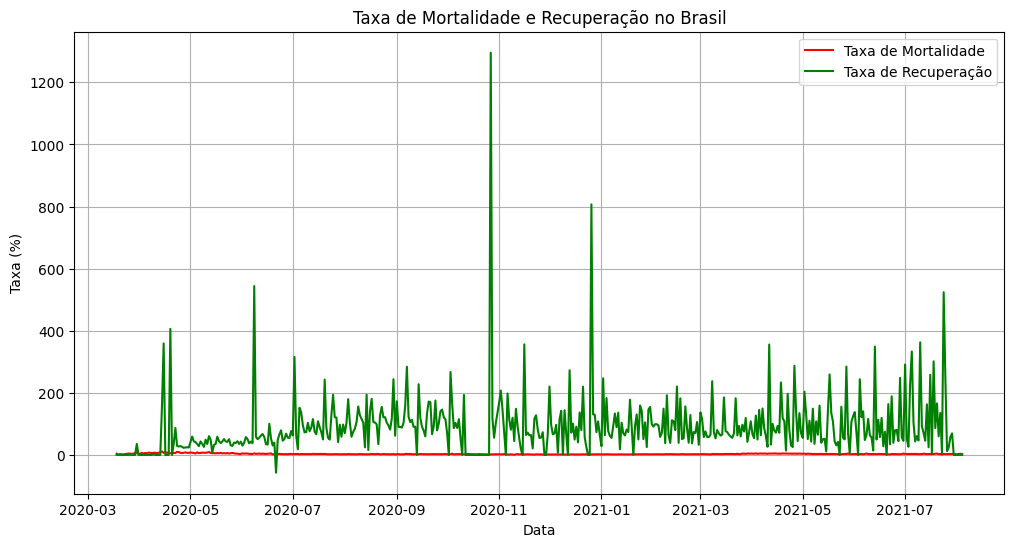

In [55]:
# Calcular as variações diárias (crescimento diário) para cada variável
brazil_data['Confirmed_Daily'] = brazil_data['Confirmed'].diff().fillna(0)
brazil_data['Deaths_Daily'] = brazil_data['Deaths'].diff().fillna(0)
brazil_data['Recovered_Daily'] = brazil_data['Recovered'].diff().fillna(0)

# Calcular a taxa de mortalidade e taxa de recuperação diárias
brazil_data['Mortality_Rate'] = (brazil_data['Deaths_Daily'] / brazil_data['Confirmed_Daily']) * 100
brazil_data['Recovery_Rate'] = (brazil_data['Recovered_Daily'] / brazil_data['Confirmed_Daily']) * 100

# Exibir as 5 primeiras linhas para visualização
print(brazil_data[['Confirmed_Daily', 'Deaths_Daily', 'Recovered_Daily', 'Mortality_Rate', 'Recovery_Rate']].head())

# Visualização 2: Taxas de Mortalidade e Recuperação
plt.figure(figsize=(12, 6))
sns.lineplot(data=brazil_data, x=brazil_data.index, y='Mortality_Rate', label='Taxa de Mortalidade', color='red')
sns.lineplot(data=brazil_data, x=brazil_data.index, y='Recovery_Rate', label='Taxa de Recuperação', color='green')
plt.title('Taxa de Mortalidade e Recuperação no Brasil')
plt.xlabel('Data')
plt.ylabel('Taxa (%)')
plt.legend()
plt.grid()
plt.show()


Crescimento médio diário de Casos Confirmados: 2.32%
Crescimento médio diário de Mortes: 3.06%
Crescimento médio diário de Recuperações: 9.72%

Correlação entre Confirmados, Mortes e Recuperações:
           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.995250   0.999708
Deaths      0.995250  1.000000   0.994006
Recovered   0.999708  0.994006   1.000000


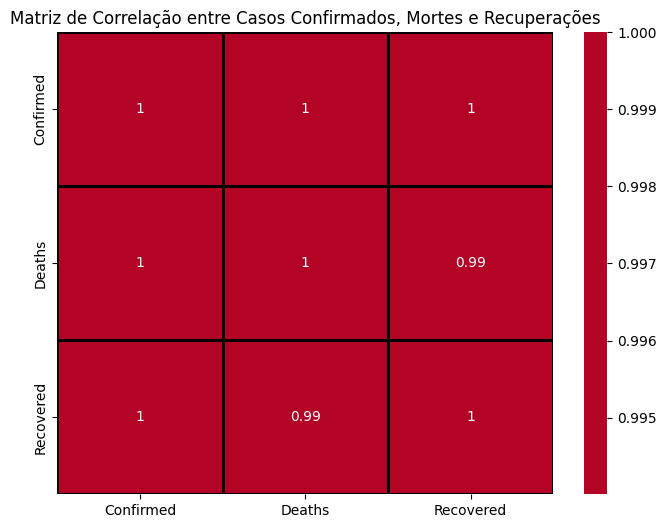

In [56]:

# Análise de Crescimento de Casos
confirmed_growth_rate = (brazil_data['Confirmed'].pct_change() * 100).mean()
death_growth_rate = (brazil_data['Deaths'].pct_change() * 100).mean()
recovered_growth_rate = (brazil_data['Recovered'].pct_change() * 100).mean()

print(f"Crescimento médio diário de Casos Confirmados: {confirmed_growth_rate:.2f}%")
print(f"Crescimento médio diário de Mortes: {death_growth_rate:.2f}%")
print(f"Crescimento médio diário de Recuperações: {recovered_growth_rate:.2f}%")

# Correlação entre Confirmados, Mortes e Recuperações
correlation_matrix = brazil_data[['Confirmed', 'Deaths', 'Recovered']].corr()
print("\nCorrelação entre Confirmados, Mortes e Recuperações:")
print(correlation_matrix)

# Visualização 3: Correlação entre Confirmados, Mortes e Recuperações
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1, linecolor='black')
plt.title('Matriz de Correlação entre Casos Confirmados, Mortes e Recuperações')
plt.show()

# **Explicação do Código:**
Pré-processamento dos Dados:

Primeiro, selecionamos as variáveis de interesse, como o número diário de casos confirmados, mortes e recuperações, além das taxas diárias de mortalidade e recuperação.
Removemos qualquer linha com valores ausentes para evitar problemas durante o treinamento.
Divisão em Treino e Teste:

Dividimos os dados em variáveis independentes (X), que incluem as taxas diárias de mortes, recuperações e as taxas de mortalidade e recuperação, e a variável dependente (y), que é o número diário de casos confirmados.
Treinamento do Modelo:

Utilizamos a regressão linear, um modelo de ML simples e adequado para prever valores contínuos como os casos diários de COVID-19.
Avaliação do Modelo:

Calculamos o erro quadrático médio (MSE) e a métrica R² para avaliar a qualidade do modelo. O MSE indica o quão distante as predições estão dos valores reais, e o R² indica a proporção da variação dos dados explicada pelo modelo.
Visualizações:

Predições vs Valores Reais: Criamos um gráfico de dispersão para comparar as predições feitas pelo modelo com os valores reais dos casos confirmados.
Erro de Previsão: Criamos um histograma para visualizar a distribuição dos erros de previsão, ajudando a entender a precisão do modelo.
Interpretação dos Resultados:
Erro Quadrático Médio (MSE): Quanto menor o valor do MSE, melhor o modelo está em termos de precisão das previsões.
R²: Esse valor varia entre 0 e 1. Quanto mais próximo de 1, melhor o modelo explica a variabilidade dos dados.